In [2]:
# Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../')

from src import customFunc as cf
from src import ansatzs as anz

c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


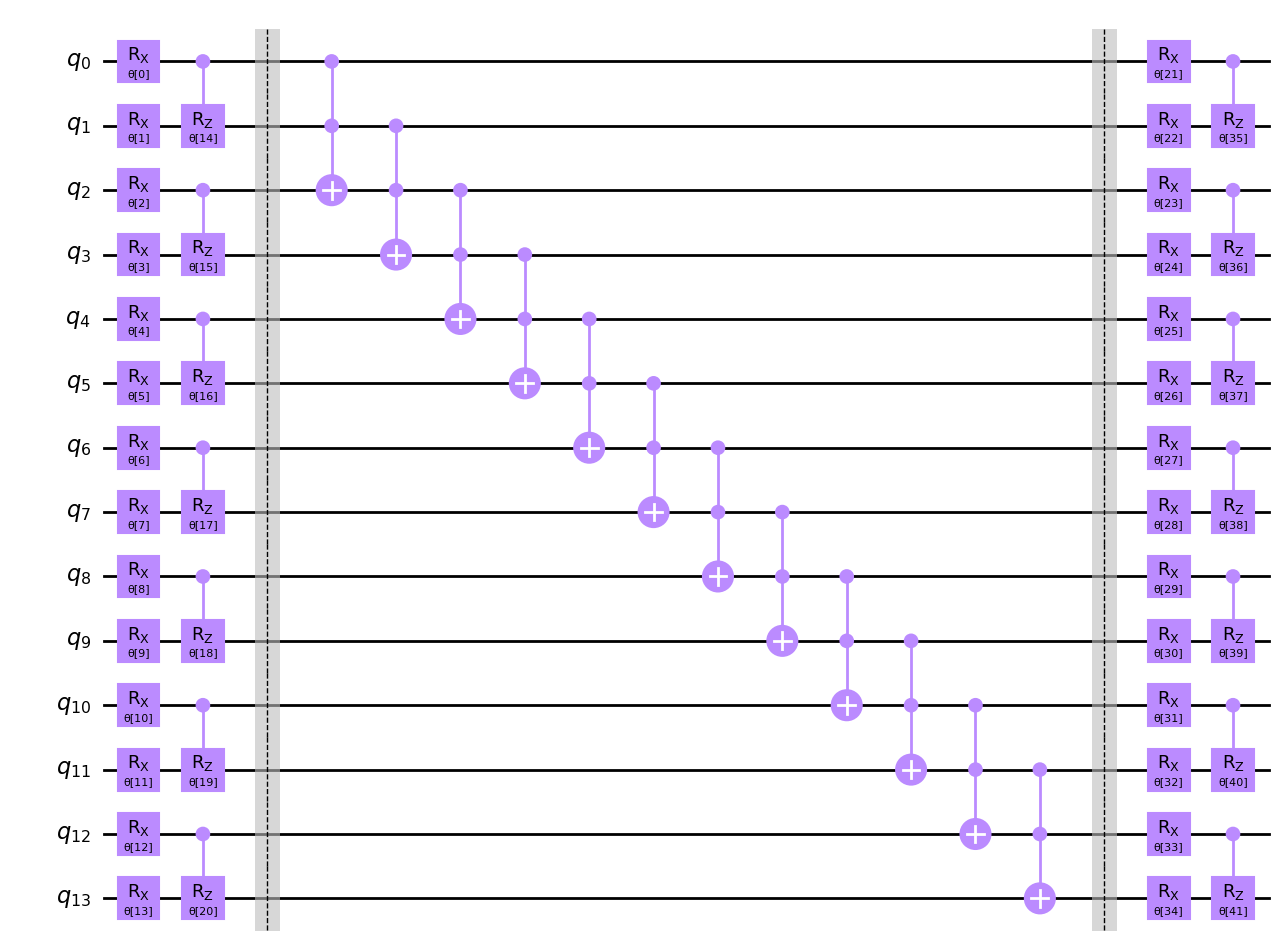

In [3]:
# Create ansatz
ansatz, n_params = anz.build_Nlocal_ansatz(14, 1)
ansatz.decompose().draw("mpl")

In [ ]:
# Load the hamiltonians and repulsion energies to apply VQE
distances = np.linspace(0.25, 4, 16)
total_energies = []

for dist in distances:
    # Hamiltonians
    with open(f"data/hamiltonian{dist:.3f}.pkl", "rb") as f:
        hamiltonian = pickle.load(f)
    # Repulsion energies
    with open(f"data/nuclear_repulsion{dist:.3f}.pkl", "rb") as f:
        nuclear_repulsion = pickle.load(f)

    total_energies.append(cf.VQE_minimization_BP(anz.build_Nlocal_ansatz, 14, 14, hamiltonian, [], print_info=False, plot_info=False)["minimum_values"][0] + nuclear_repulsion)

plt.plot(distances, total_energies)

### Analizing BP for the equilibrium point, d = 1.000

SparsePauliOp(['IIIIIIIIIIIIII', 'IIIIIIIIIIIIIZ', 'IIIIIIIIIIIIYY', 'IIIIIIIIIIIIXX', 'IIIIIIIIIIIYZY', 'IIIIIIIIIIIXZX', 'IIIIIIIIIIYZZY', 'IIIIIIIIIIXZZX', 'IIIIIIIIYZZZZY', 'IIIIIIIIXZZZZX', 'IIIIIIIYZZZZZY', 'IIIIIIIXZZZZZX', 'IIIIIIIIIIIIZI', 'IIIIIIIIIIIYYI', 'IIIIIIIIIIIXXI', 'IIIIIIIIIIYZYI', 'IIIIIIIIIIXZXI', 'IIIIIIIIYZZZYI', 'IIIIIIIIXZZZXI', 'IIIIIIIYZZZZYI', 'IIIIIIIXZZZZXI', 'IIIIIIIIIIIZII', 'IIIIIIIIIIYYII', 'IIIIIIIIIIXXII', 'IIIIIIIIYZZYII', 'IIIIIIIIXZZXII', 'IIIIIIIYZZZYII', 'IIIIIIIXZZZXII', 'IIIIIIIIIIZIII', 'IIIIIIIIYZYIII', 'IIIIIIIIXZXIII', 'IIIIIIIYZZYIII', 'IIIIIIIXZZXIII', 'IIIIIIIIIZIIII', 'IIIIIIIIZIIIII', 'IIIIIIIYYIIIII', 'IIIIIIIXXIIIII', 'IIIIIIIZIIIIII', 'IIIIIIZIIIIIII', 'IIIIIYYIIIIIII', 'IIIIIXXIIIIIII', 'IIIIYZYIIIIIII', 'IIIIXZXIIIIIII', 'IIIYZZYIIIIIII', 'IIIXZZXIIIIIII', 'IYZZZZYIIIIIII', 'IXZZZZXIIIIIII', 'YZZZZZYIIIIIII', 'XZZZZZXIIIIIII', 'IIIIIZIIIIIIII', 'IIIIYYIIIIIIII', 'IIIIXXIIIIIIII', 'IIIYZYIIIIIIII', 'IIIXZXIIIIIIII', 'IYZZZYIIIIII

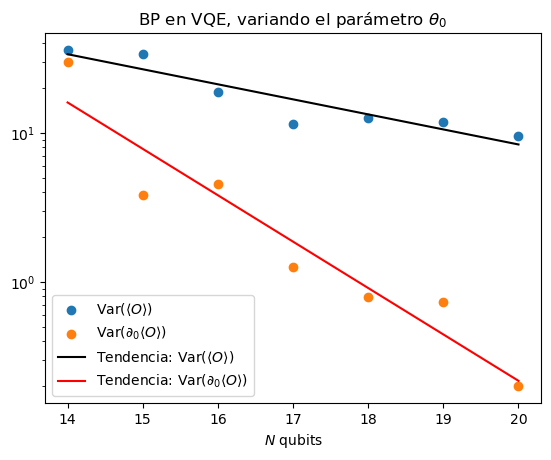


Calculando varianzas con 14 qubits.

Varianza del valor esperado: 26.156012286830375
Varianza de la derivada: 3.578027980214506

Calculando varianzas con 15 qubits.

Varianza del valor esperado: 23.541103770028858
Varianza de la derivada: 20.048420413858807

Calculando varianzas con 16 qubits.

Varianza del valor esperado: 18.005858658417022
Varianza de la derivada: 6.543682042197562

Calculando varianzas con 17 qubits.

Varianza del valor esperado: 9.666812453901139
Varianza de la derivada: 3.9414145855131775

Calculando varianzas con 18 qubits.

Varianza del valor esperado: 10.73794864384301
Varianza de la derivada: 1.8495128323379513

Calculando varianzas con 19 qubits.

Varianza del valor esperado: 12.740751347184785
Varianza de la derivada: 0.9087048611583056

Calculando varianzas con 20 qubits.

Varianza del valor esperado: 6.345369372088048
Varianza de la derivada: 0.21775357097359277

Pendiente para valor esperado: -0.2140663980202662.
R^2 para valor esperado: 0.82014951255002

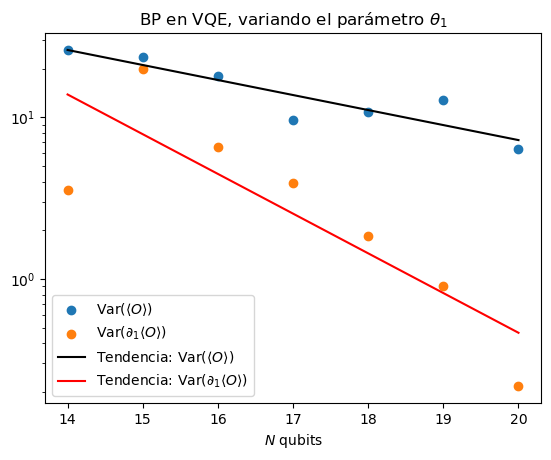


Calculando varianzas con 14 qubits.

Varianza del valor esperado: 36.05535805638759
Varianza de la derivada: 2.0022063629776485

Calculando varianzas con 15 qubits.

Varianza del valor esperado: 30.22481256631344
Varianza de la derivada: 3.9659486022995685

Calculando varianzas con 16 qubits.

Varianza del valor esperado: 16.29317300423183
Varianza de la derivada: 10.993638066408966

Calculando varianzas con 17 qubits.

Varianza del valor esperado: 13.455201291469647
Varianza de la derivada: 2.0693226743796704

Calculando varianzas con 18 qubits.

Varianza del valor esperado: 7.826486526444956
Varianza de la derivada: 1.1278934447396853

Calculando varianzas con 19 qubits.

Varianza del valor esperado: 6.124006300694955
Varianza de la derivada: 0.9800514458264676

Calculando varianzas con 20 qubits.

Varianza del valor esperado: 7.171032497984234
Varianza de la derivada: 1.0089805415344133

Pendiente para valor esperado: -0.31325512058896915.
R^2 para valor esperado: 0.924401672747732

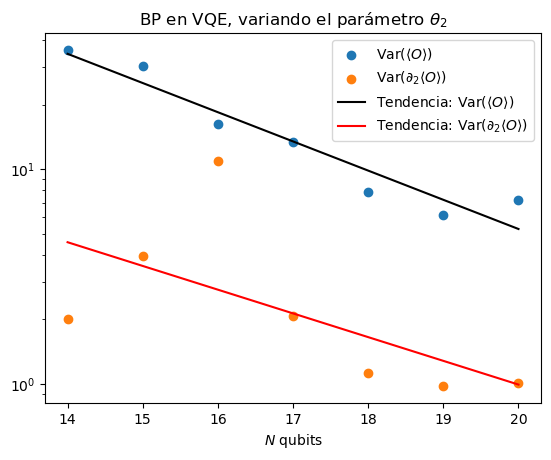

In [4]:
with open("data/hamiltonian1.000.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

print(hamiltonian)

data = []

for j in range(3):
    data.append(cf.variance_vs_nQubits(anz.build_Nlocal_ansatz, 14, 20, hamiltonian, j, 50, True, True, True))